In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
%matplotlib inline

# unknown $\mu$ and known $\sigma$ ----------------------------------------

## hypothesis

$H_{0}$: mean $\mu = \mu_{0}$

$H_{1}$: mean $\mu \neq \mu_{0}$

standard deviation (known): $\sigma_{0}$

significance level: $\alpha = 0.05$ (probability to reject $H_{0}$)

In [78]:
N = 20         # number of samples.
sgm = 2.0      # sigma 0
mu_true = 10.0 # true mean
mu_test = 9.6  # mu0

x = np.random.normal(loc=mu_true, scale=sgm, size=N)
mu_pop = x.mean()
u = (mu_pop - mu_test) / (sgm / np.sqrt(N))
print('population mean = {:2.3f}'.format(mu_pop))
print('population mean normalized with respect to mu_test = {:1.4f}'.format(u))

population mean = 9.980
population mean normalized with respect to mu_test = 0.8490


Examine type-I error ($H_{0}$)

In [79]:
za2 = spst.norm.ppf([0.025, 0.975])
print('z_(a/2)   = {:1.4f}'.format(za2[0]))
print('z_(1-a/2) =  {:1.4f}'.format(za2[1]))
print('u         =  {:1.4f}'.format(u))
print('probability to obtain u = {:1.4f} given mu_test = {:2.2f}'.format(spst.norm().pdf(u), mu_test))

z_(a/2)   = -1.9600
z_(1-a/2) =  1.9600
u         =  0.8490
probability to obtain u = 0.2782 given mu_test = 9.60


Examine type-II error ($H_{1}$)

Here we test if $\mu \neq \mu_{0}$, namely, we have to pick $\mu$.

Question: how should we pick this $\mu$? (avoid false positive)

Define $\Delta = \frac{\mu - \mu_{0}}{\sigma_{0}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(|u| \ge z_{\alpha /2}\big) \\
\quad & = &\quad Pr\big(u \le -z_{\alpha /2}\big) + Pr\big(u \ge z_{\alpha /2}\big)\\
\quad & = &\quad Pr\bigg(\frac{\bar{x} - \mu_{0}}{\sigma_{0}} \le -z_{\alpha /2}\bigg) + Pr\bigg(\frac{\bar{x} - \mu_{0}}{\sigma_{0}} \ge z_{\alpha /2}\bigg)\\
\quad & = &\quad Pr\bigg(\frac{\bar{x} - \mu}{\sigma_{0}/\sqrt{N}} + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}} \le -z_{\alpha /2}\bigg) + Pr\bigg(\frac{\bar{x} - \mu}{\sigma_{0}/\sqrt{N}} + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}}  \ge z_{\alpha /2}\bigg)\\
\quad & = &\quad Pr\bigg(u + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}} \le -z_{\alpha /2}\bigg) + Pr\bigg(u + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}}  \ge z_{\alpha /2}\bigg)\\
\quad & = &\quad Pr\big(u + \sqrt{N}\Delta \le -z_{\alpha /2}\big) + Pr\big(u + \sqrt{N}\Delta \ge z_{\alpha /2}\big)\\
\quad & = &\quad Pr\big(u  \le -z_{\alpha /2} - \sqrt{N}\Delta\big) + Pr\big(u \ge z_{\alpha /2} - \sqrt{N}\Delta\big)
\end{align}$$



We consider $N(\mu_{0}, \sigma_{0})$ as population 0 and $N(\mu, \sigma_{0})$ as population 1, where $\mu$ is to be picked.

For convenience, consider $\Delta > 0 \Rightarrow \mu > \mu_{0}$.


(1) We may decide $m = \frac{\Delta}{2}$. such that

$\qquad$ p = CDF($N(\mu_{0}, \sigma_{0})$, $x \le m$)

$\qquad$ p = CDF($N(\mu, \sigma_{0})$, $x \ge m$)

For example, $p = 0.8 \Rightarrow z_{0.8} = 0.8416 = m = \frac{\Delta}{2} \Rightarrow \Delta = 1.683$.

$\qquad \Rightarrow \qquad \mu = \mu_{0} + 1.683 \sigma_{0}$


(2) We may decide $\mu$ such that

$\qquad$ p = CDF($N(\mu_{0}, \sigma_{0})$, $x \le \mu$)

$\qquad$ 0.5 = CDF($N(\mu, \sigma_{0})$, $x \le \mu$)

For example, $p = 0.9 \Rightarrow z_(0.9) = 1.282 \Rightarrow \Delta = 1.282$. 

$\qquad \Rightarrow \qquad \mu = \mu_{0} + 1.282 \sigma_{0}$

Let's take the approach (1) for here.


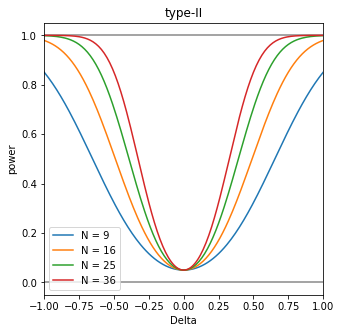

In [94]:
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    power = 1 - spst.norm().cdf(za2[1] - np.sqrt(N) * deltas)
    power += spst.norm().cdf(za2[0] - np.sqrt(N) * deltas)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### design of sample size according to a specified power

Suppose $\Delta > \Delta_{0} > 0$ and $\sqrt{N}\Delta$ is not too small.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(u  \le -z_{\alpha /2} - \sqrt{N}\Delta_{0}\big) + Pr\big(u \ge z_{\alpha /2} - \sqrt{N}\Delta_{0}\big)\\
\quad & \approx &\quad Pr\big(u \ge z_{\alpha /2} - \sqrt{N}\Delta_{0}\big)
\end{align}$$

Therefore, 
$$\begin{align}
\Rightarrow \qquad z_{1 - \beta} \quad & = &\quad  z_{\alpha /2} - \sqrt{N}\Delta_{0}\\
\Rightarrow \qquad N \quad & = &\quad \bigg(\frac{z_{\alpha /2} - z_{1 - \beta}}{\Delta_{0}}\bigg)^{2}\\
\end{align}$$

## hypothesis

H0: mean $\mu = \mu_{0}$

H1: mean $\mu > \mu_{0}$

Examine type-II error ($H_{1}$)

Here we test if $\mu \ge \mu_{0}$.

Similarly, define $\Delta = \frac{\mu - \mu_{0}}{\sigma_{0}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(u \ge z_{\alpha}\big) \\
\quad & = &\quad Pr\big(u \ge z_{\alpha}\big)\\
\quad & = &\quad Pr\bigg(u + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}}  \ge z_{\alpha}\bigg)\\
\quad & = &\quad Pr\big(u + \sqrt{N}\Delta \ge z_{\alpha}\big)\\
\quad & = &\quad Pr\big(u \ge z_{\alpha} - \sqrt{N}\Delta\big)
\end{align}$$

In [96]:
N = 20         # number of samples.
sgm = 2.0      # sigma 0
mu_true = 10.0 # true mean
mu_test = 9.6  # mu 0

x = np.random.normal(loc=mu_true, scale=sgm, size=N)
mu_pop = x.mean()
u = (mu_pop - mu_test) / (sgm / np.sqrt(N))
print('population mean = {:2.3f}'.format(mu_pop))
print('population mean normalized with respect to mu_test = {:1.4f}'.format(u))

population mean = 10.302
population mean normalized with respect to mu_test = 1.5689


In [97]:
za = spst.norm.ppf(0.95)
print('z_(a) = {:1.4f}'.format(za))
print('u     = {:1.4f}'.format(u))
print('probability to obtain u = {:1.4f} given mu_test = {:2.2f}'.format(spst.norm().pdf(u), mu_test))

z_(a) = 1.6449
u     = 1.5689
probability to obtain u = 0.1165 given mu_test = 9.60


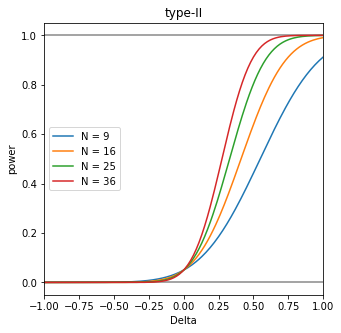

In [98]:
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    power = 1 - spst.norm().cdf(za - np.sqrt(N) * deltas)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### design of sample size according to a specified power

Suppose $\Delta > \Delta_{0} > 0$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(u \ge z_{\alpha} - \sqrt{N}\Delta_{0}\big)
\end{align}$$

Therefore, 
$$\begin{align}
\Rightarrow \qquad z_{1 - \beta} \quad & = &\quad  z_{\alpha} - \sqrt{N}\Delta_{0}\\
\Rightarrow \qquad N \quad & = &\quad \bigg(\frac{z_{\alpha} - z_{1 - \beta}}{\Delta_{0}}\bigg)^{2}\\
\end{align}$$

## hypothesis

H0: mean $\mu = \mu_{0}$

H1: mean $\mu < \mu_{0}$

Examine type-II error ($H_{1}$)

Here we test if $\mu \le \mu_{0}$.

Similarly, define $\Delta = \frac{\mu - \mu_{0}}{\sigma_{0}}$.

$$\begin{align}
1 - \beta \quad & = &\quad Pr\big(u \le -z_{\alpha}\big) \\
\quad & = &\quad Pr\big(u \le -z_{\alpha}\big)\\
\quad & = &\quad Pr\bigg(u + \frac{\mu - \mu_{0}}{\sigma_{0}/\sqrt{N}} \le -z_{\alpha}\bigg)\\
\quad & = &\quad Pr\big(u + \sqrt{N}\Delta \le -z_{\alpha}\big)\\
\quad & = &\quad Pr\big(u \le -z_{\alpha} - \sqrt{N}\Delta\big)
\end{align}$$


In [99]:
za = spst.norm.ppf(0.05)
print('z_(a) = {:1.4f}'.format(za))
print('u     = {:1.4f}'.format(u))
print('probability to obtain u = {:1.4f} given mu_test = {:2.2f}'.format(spst.norm().pdf(u), mu_test))

z_(a) = -1.6449
u     = 1.5689
probability to obtain u = 0.1165 given mu_test = 9.60


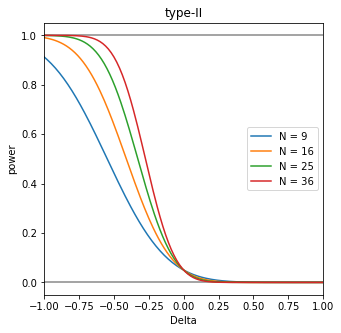

In [102]:
deltas = np.arange(-1.0, 1.01, 0.01)
Ns = [x**2 for x in range(3, 7)]

plt.rcParams['figure.figsize'] = (5.0, 5.0)
for N in Ns:
    power = spst.norm().cdf(za - np.sqrt(N) * deltas)
    plt.axhline(1, lw=0.2, color=(0., 0., 0.))
    plt.axhline(0, lw=0.2, color=(0., 0., 0.))
    plt.plot(deltas, power, '-', label='N = {}'.format(N))
    plt.xlim((-1., 1.))
    plt.ylim((-0.05, 1.05))
    plt.legend(loc='best')
    plt.xlabel('Delta')
    plt.ylabel('power')
    plt.title('type-II')

### design of sample size according to a specified power

Suppose $\Delta < -\Delta_{0}$ and $\Delta_{0} > 0$.

$$\begin{align}
1 - \beta \quad & = &\quad 1 - Pr\big(u \ge - z_{\alpha} + \sqrt{N}\Delta_{0}\big)
\end{align}$$

Therefore, 
$$\begin{align}
\Rightarrow \qquad z_{\beta} \quad & = &\quad  -z_{\alpha} + \sqrt{N}\Delta_{0}\\
\Rightarrow \qquad N \quad & = &\quad \bigg(\frac{z_{\alpha} - z_{1 - \beta}}{\Delta_{0}}\bigg)^{2}\\
\end{align}$$

### exercises 3.1 - 3.10

In [127]:
x = np.array([6.2, 4.8, 7.3, 5.5, 6.5, 4.9, 6.8, 7.9, 6.6, 7.3])
mu0 = 5.0
sgm = 1.0
a = 0.05

In [128]:
N = x.shape[0]
xm = x.mean()
u = (xm - mu0)/(sgm/np.sqrt(N))
za2 = spst.norm.ppf([a/2, 1 - a/2])

In [129]:
print('mu_p   = {:1.4f}'.format(xm))
print('z_(a/2)   = {:1.4f}'.format(za2[0]))
print('z_(1-a/2) =  {:1.4f}'.format(za2[1]))
print('u         =  {:1.4f}'.format(u))
print('probability to obtain u = {:1.7f} given mu_0 = {:2.2f}'.format(spst.norm().pdf(u), mu0))

mu_p   = 6.3800
z_(a/2)   = -1.9600
z_(1-a/2) =  1.9600
u         =  4.3639
probability to obtain u = 0.0000292 given mu_0 = 5.00


In [134]:
x = np.array([10.8, 11.2, 9.7, 9.9, 12.0, 9.6, 10.5, 10.7, 10.1])
mu0 = 10.0
sgm = 0.7
a = 0.05

In [138]:
N = x.shape[0]
xm = x.mean()
u = (xm - mu0)/(sgm/np.sqrt(N))
za = spst.norm.ppf(1 - a)

In [139]:
print('mu_p  = {:1.4f}'.format(xm))
print('z_a   = {:1.4f}'.format(za))
print('u     = {:1.4f}'.format(u))
print('probability to obtain u = {:1.7f} given mu_0 = {:2.2f}'.format(spst.norm().pdf(u), mu0))

mu_p  = 10.5000
z_a   = 1.6449
u     = 2.1429
probability to obtain u = 0.0401611 given mu_0 = 10.00


In [140]:
x = np.array([21, 19, 16, 19, 22, 18, 20, 21])
mu0 = 20.0
sgm = 2.0
a = 0.05

In [141]:
N = x.shape[0]
xm = x.mean()
u = (xm - mu0)/(sgm/np.sqrt(N))
za = spst.norm.ppf(a)

In [142]:
print('mu_p  = {:1.4f}'.format(xm))
print('z_a   = {:1.4f}'.format(za))
print('u     = {:1.4f}'.format(u))
print('probability to obtain u = {:1.7f} given mu_0 = {:2.2f}'.format(spst.norm().pdf(u), mu0))

mu_p  = 19.5000
z_a   = -1.6449
u     = -0.7071
probability to obtain u = 0.3106966 given mu_0 = 20.00


In [167]:
a = 0.05
za2 = spst.norm.ppf([a/2, 1 - a/2])
1 - spst.norm.cdf(za2[1] - np.sqrt(10) * 0.5) + spst.norm.cdf(za2[0] - np.sqrt(10) * 0.5)

0.35260808244470254

In [166]:
a = 0.05
za2 = spst.norm.ppf([a/2, 1 - a/2])
1 - spst.norm.cdf(za2[1] - np.sqrt(20) * 0.5) + spst.norm.cdf(za2[0] - np.sqrt(20) * 0.5)

0.60877948464545673

In [173]:
a = 0.05
za = spst.norm.ppf(1 - a)
1 - spst.norm.cdf(za - np.sqrt(9) * 1.0)

0.9123145367502965

In [174]:
a = 0.05
za = spst.norm.ppf(1 - a)
1 - spst.norm.cdf(za - np.sqrt(9) * 1.5)

0.9978491500879838

In [176]:
a = 0.05
za = spst.norm.ppf(a)
spst.norm.cdf(za + np.sqrt(8) * 1.0)

0.8817090317783467

In [177]:
a = 0.05
za = spst.norm.ppf(a)
spst.norm.cdf(za + np.sqrt(16) * 1.0)

0.99074229462650465

In [179]:
a = 0.05
za = spst.norm.ppf(a/2)
pwr = 0.9
zpwr = spst.norm.ppf(pwr)
((zpwr - za)/0.8)**2

16.417848533500969

In [182]:
a = 0.05
za = spst.norm.ppf(a/2)
pwr = 0.9
zpwr = spst.norm.ppf(pwr)
int(np.ceil(((zpwr - za)/0.8)**2))

17

In [184]:
a = 0.05
za = spst.norm.ppf(a)
pwr = 0.9
zpwr = spst.norm.ppf(pwr)
int(np.ceil(((zpwr - za)/1.0)**2))

9

In [185]:
a = 0.05
za = spst.norm.ppf(a)
pwr = 0.9
zpwr = spst.norm.ppf(pwr)
int(np.ceil(((zpwr - za)/0.5)**2))

35

In [186]:
a = 0.05
za = spst.norm.ppf(1 - a)
pwr = 0.9
zpwr = spst.norm.ppf(1 - pwr)
int(np.ceil(((zpwr - za)/1.2)**2))

6

In [189]:
a = 0.05
za = spst.norm.ppf(1 - a)
pwr = 0.95
zpwr = spst.norm.ppf(1 - pwr)
int(np.ceil(((zpwr - za)/1.5)**2))

5

In [ ]:
# unknown $\mu$ and known $\sigma$ ----------------------------------------